# EDA 1 - Dataset

In [13]:
%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings('ignore')

import os
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from tqdm import tqdm

import sys
sys.path.append(os.path.abspath('..'))

from tools.mask import rle2mask, plotmask

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Image Size

In [52]:
for dataset in ['train', 'test']:
    path = os.path.join('..', 'Data', f'{dataset}_images')
    size_dir = {}
    for impath in os.listdir(path):
        imsize = str(Image.open(os.path.join(path, impath)).size)
        if size_dir.__contains__(imsize):
            size_dir[imsize] += 1
        else:
            size_dir[imsize] = 1
    # Traversing & print size_dir 
    print(dataset, ':')
    for key, val in size_dir.items():
        print(key, ' ', '-'*10, ' ', val)

train :
(1600, 256)   ----------   12568
test :
(1600, 256)   ----------   1801


我们可以看出，所有的图片都有同样的规格，这是一个好现象。

## Show image

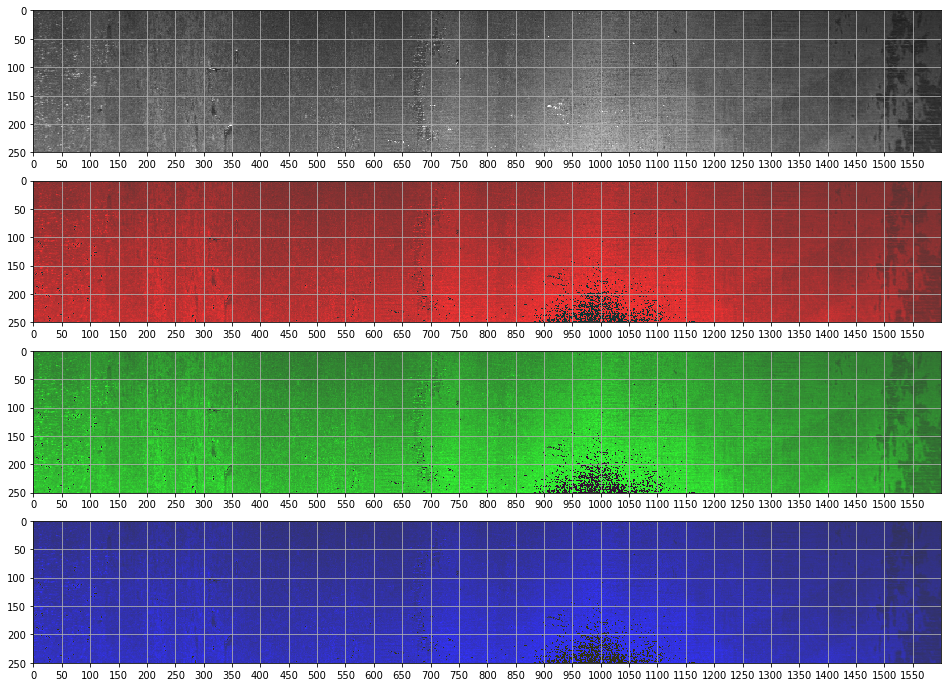

In [119]:
path = os.path.join('..', 'Data', 'train_images', '0002cc93b.jpg')
img_arr = np.array(Image.open(path))
plt.figure(figsize=[25,12])
plt.subplot(4, 1, 1)
plt.imshow(img_arr)
plt.grid()
plt.xticks(np.arange(0, 1600, 50))
plt.yticks(np.arange(0, 256, 50))
for i in range(3):
    plt.subplot(4 ,1 ,i+2)
    newarr = img_arr.copy()
    newarr[:,:,list({0,1,2}-{i})] = np.zeros([256, 1600, 2])
    newarr = (newarr*1.3+50).astype('uint8')   # (255-(255-newarr)/2)
    plt.imshow(newarr)
    plt.grid()
    plt.xticks(np.arange(0, 1600, 50))
    plt.yticks(np.arange(0, 256, 50))
plt.show()

## Show Label

In [5]:
train_df = pd.read_csv('../data/train.csv', sep=r'[,_]', na_filter=False)

In [6]:
train_df.head()

,ImageId,ClassId,EncodedPixels
0,0002cc93b.jpg,1,29102 12 29346 24 29602 24 29858 24 30114 24 3...
1,0002cc93b.jpg,2,
2,0002cc93b.jpg,3,
3,0002cc93b.jpg,4,
4,00031f466.jpg,1,


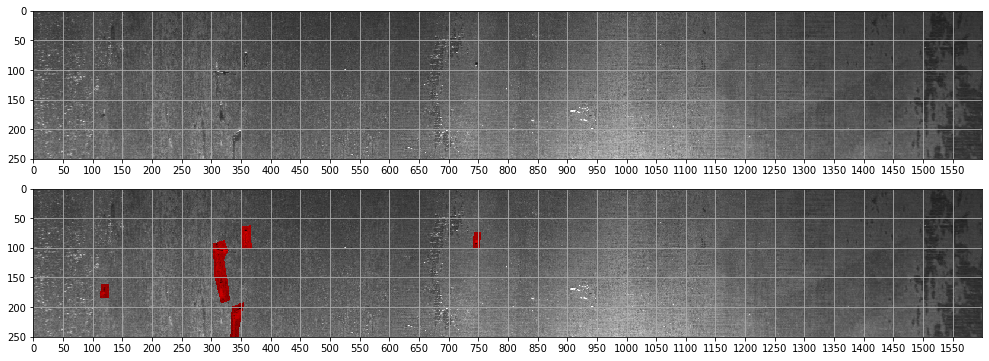

In [12]:
iminfo = {1: train_df.EncodedPixels[0]}

path = os.path.join('..', 'data', 'train_images', '0002cc93b.jpg')
img_arr = np.array(Image.open(path))

plotmask(iminfo, img_arr, [25, 6])

In [23]:
%timeit r = rle2mask(train_df.EncodedPixels[0], 256, 1600)

301 µs ± 29.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
